In [1]:
#importing libraries/ packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as fits

In [2]:
#loading data
data = fits.open("G 9-40_med-58119-kp2_05_901_sp16-218.fits")

In [3]:
#checking the data structure
data.info()

Filename: G 9-40_med-58119-kp2_05_901_sp16-218.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Information    1 PrimaryHDU      91   ()      
  1  COADD_B       1 BinTableHDU     37   1R x 6C   [4110E, 4110E, 4110E, 4110I, 4110I, 4110D]   
  2  COADD_R       1 BinTableHDU     37   1R x 6C   [3767E, 3767E, 3767E, 3767I, 3767I, 3767D]   
  3  B-83691535    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  4  B-83691548    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  5  B-83691562    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  6  R-83691535    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  7  R-83691548    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   
  8  R-83691562    1 BinTableHDU     36   1R x 5C   [4136E, 4136E, 4136E, 4136I, 4136D]   


In [9]:
#based on the data structure, the spectra are in the No.1 and No.2
#No1. COADD_B: Blue arm spectra
#No2. COADD_R: Red arm spectra

In [4]:
#showing data header, just because v:
data[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11b          
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                98640 /Number of bytes per row                         
NAXIS2  =                    1 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    6 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'COADD_B '           / The extension name                             
NORM    =                   

In [15]:
#based on the data header, COADD_B and COADD_R consist of FLUX, IVAR?, WAVELENTH, ANDMASK?, ORMASK?, (FLUX) NORMALIZATION data

In [5]:
#assigning the data into variables, flux and wavelength

#Red arm spectra
wvr = data[2].data["WAVELENGTH"]
flr = data[2].data["FLUX"]

#Blue arm spectra
wvb = data[1].data["WAVELENGTH"]
flb = data[1].data["FLUX"]

In [6]:
#checking the wavelength range, just because v:
print(np.min(wvr),np.max(wvr)) #for red arm
print(np.min(wvb),np.max(wvb)) #blue arm

6302.168 6873.0557
4901.3984 5387.782


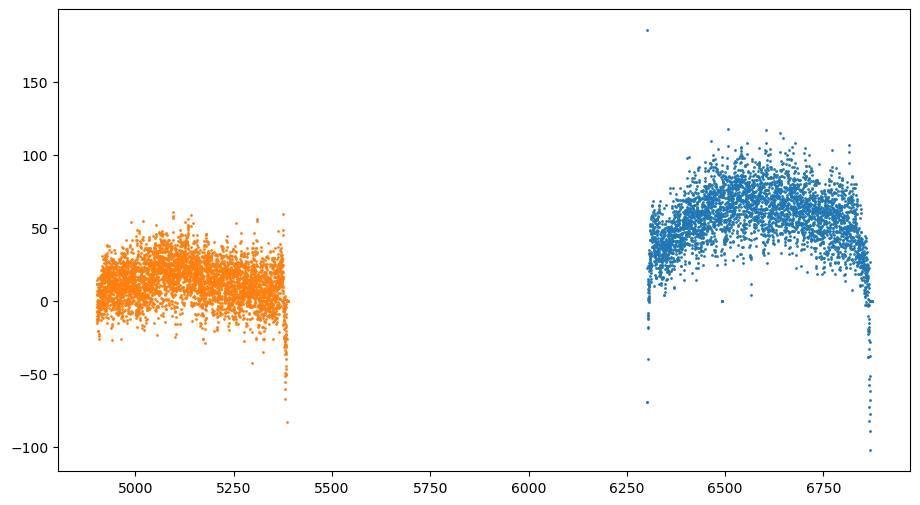

In [7]:
#quick plot
plt.figure(figsize=(11,6))
plt.scatter(wvr,flr,s=1)
plt.scatter(wvb,flb,s=1)
plt.show()

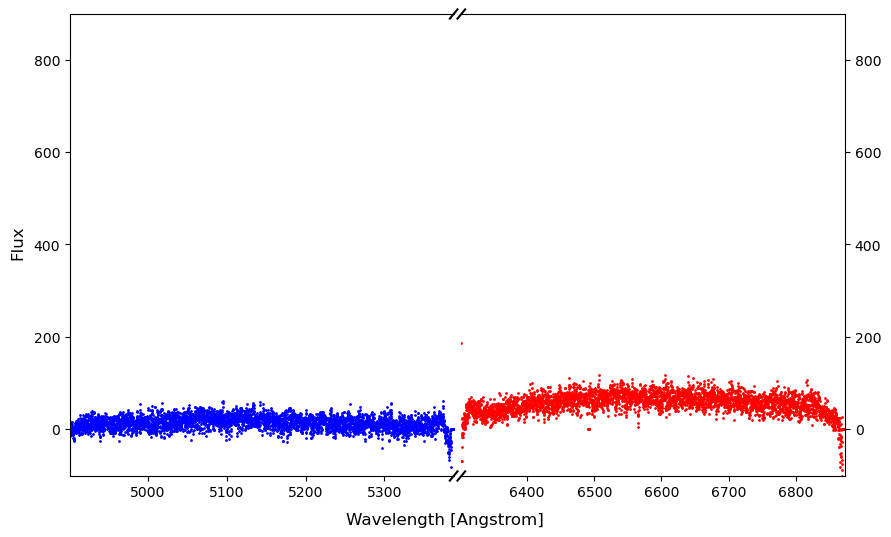

In [8]:
#plotting broken axis example, where the x-axis will have a portion cut out.

import matplotlib.pylab as plt
import numpy as np

#wavelength
x1 = wvb
x2 = wvr

#flux
y1 = flb
y2 = flr

f, (ax, ax2) = plt.subplots(1, 2, sharey=True, facecolor='w',figsize=(10,6))
f.subplots_adjust(wspace=0.020)

# plot the same data on both axes
ax.scatter(x1, y1,s=1, color="blue")
ax2.scatter(x2, y2,s=1, color="red")

ax.set_xlim(np.min(x1), np.max(x1))
ax2.set_xlim(np.min(x2), np.max(x2))

ax.set_ylim(np.min(flb), 900)
ax2.set_ylim(np.min(flr),900)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax2.tick_params(labelright='off')
ax2.yaxis.tick_right()

d = 0.01  # how big to make the diagonal lines in axes coordinates

kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1-d, 1+d), (-d, +d), **kwargs)
ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1-d, 1+d), **kwargs)
ax2.plot((-d, +d), (-d, +d), **kwargs)

f.text(0.5, 0.03, 'Wavelength [Angstrom]',ha='center',size=12)
f.text(0.065, 0.5, 'Flux', va='center', rotation='vertical',size=12)

plt.show()